# MovieLens Dataset Analysis & Recommendation System Group 17

## Project Overview
**Course**: Machine Learning Final Assessment

**Role**: Data Scientists / ML Engineers for a Leading Streaming Platform

**Mission**: Extract value from massive customer interaction logs and deliver business insights and deployable recommendation features.

---


---
# SECTION A: DATA UNDERSTANDING & PRE-PROCESSING
---

This section handles:
- Data loading from all CSV files
- Data quality assessment (missing values, duplicates)
- Data transformation (timestamps, genre parsing)
- Basic exploratory analysis

## A.1: Import Libraries

In [64]:
# Fix for Windows joblib/loky CPU detection issue
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Set to your actual CPU core count

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Date/time handling
from datetime import datetime

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Statistics
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage

# Text processing
from collections import Counter
import re

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Additional imports for ML models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, classification_report, r2_score
import pickle

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## A.2: Data Loading Functions and EDA

In [68]:
ratings = pd.read_csv("ML_FP_DS/ratings.csv")
movies = pd.read_csv("ML_FP_DS/movies.csv")
tags = pd.read_csv("ML_FP_DS/tags.csv")
links = pd.read_csv("ML_FP_DS/links.csv")
genome_tags = pd.read_csv("ML_FP_DS/genome-tags.csv")
genome_scores = pd.read_csv("ML_FP_DS/genome-scores.csv")
print("All Datasets Loaded")


All Datasets Loaded


In [76]:
# Display sample data
print("=" * 80)
print("SAMPLE DATA")
print("=" * 80)

print("\nRatings:")
print(ratings.head())

print("\nMovies:")
print(movies.head())

print("\nTags:")
print(tags.head())

SAMPLE DATA

Ratings:
   userId  movieId  rating           timestamp  year  month
0       1        1     4.0 2008-11-03 17:52:19  2008     11
1       1      110     4.0 2008-11-05 06:04:46  2008     11
2       1      158     4.0 2008-11-03 17:31:43  2008     11
3       1      260     4.5 2008-11-03 18:00:04  2008     11
4       1      356     5.0 2008-11-03 17:58:39  2008     11

Movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Tags:
   user

## A.3: Data Quality Assessment Functions

In [70]:
# Check missing values in each dataset
print("Missing values:")
print(f"Ratings: {ratings.isnull().sum().sum()}")
print(f"Movies: {movies.isnull().sum().sum()}")
print(f"Tags: {tags.isnull().sum().sum()}")
print(f"Links: {links.isnull().sum().sum()}")
print(f"Genome Tags: {genome_tags.isnull().sum().sum()}")
print(f"Genome Scores: {genome_scores.isnull().sum().sum()}")

Missing values:
Ratings: 0
Movies: 0
Tags: 17
Links: 126
Genome Tags: 0
Genome Scores: 0


In [71]:
# Remove missing values
ratings.dropna(inplace=True)
movies.dropna(inplace=True)
tags.dropna(inplace=True)

print("✓ Missing values removed")

✓ Missing values removed


In [74]:
# Remove duplicates
ratings.drop_duplicates(inplace=True)
movies.drop_duplicates(inplace=True)
tags.drop_duplicates(inplace=True)

print("✓ Duplicates removed")
print(f"\nFinal dataset sizes:")
print(f"  - Ratings: {ratings.shape}")
print(f"  - Movies: {movies.shape}")
print(f"  - Tags: {tags.shape}")

✓ Duplicates removed

Final dataset sizes:
  - Ratings: (33832162, 6)
  - Movies: (86537, 3)
  - Tags: (2328298, 6)


## A.4: Data Transformation Functions

In [75]:
# Convert timestamps to datetime and extract features
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')

# Extract temporal features
ratings['year'] = ratings['timestamp'].dt.year
ratings['month'] = ratings['timestamp'].dt.month

tags['year'] = tags['timestamp'].dt.year
tags['month'] = tags['timestamp'].dt.month

print("✓ Timestamps converted to datetime")
print(f"  - Ratings date range: {ratings['timestamp'].min()} to {ratings['timestamp'].max()}")
print(f"  - Tags date range: {tags['timestamp'].min()} to {tags['timestamp'].max()}")

✓ Timestamps converted to datetime
  - Ratings date range: 1995-01-09 11:46:44 to 2023-07-20 08:53:33
  - Tags date range: 2005-12-24 13:00:10 to 2023-07-20 08:23:24


In [ ]:
# Split genres into lists
movies['genres'] = movies['genres'].str.split('|')

print("✓ Genres parsed into lists")
print(f"\nSample movie with genres:")
print(movies[['title', 'genres']].head(3))

## A.5: Basic Analysis Functions

In [78]:
# Basic statistics
print("=" * 80)
print("DATASET STATISTICS")
print("=" * 80)

print(f"\nTotal ratings: {len(ratings):,}")
print(f"Total movies: {len(movies):,}")
print(f"Total users: {ratings['userId'].nunique():,}")
print(f"Total tags: {len(tags):,}")

print(f"\nRating distribution:")
print(ratings['rating'].value_counts().sort_index())

print(f"\nRating statistics:")
print(f"  Mean: {ratings['rating'].mean():.3f}")
print(f"  Median: {ratings['rating'].median():.3f}")
print(f"  Std Dev: {ratings['rating'].std():.3f}")

DATASET STATISTICS

Total ratings: 33,832,162
Total movies: 86,537
Total users: 330,975
Total tags: 2,328,298

Rating distribution:
rating
0.5     566306
1.0    1013645
1.5     562409
2.0    2146492
2.5    1760733
3.0    6400664
3.5    4465001
4.0    8835955
4.5    3123055
5.0    4957902
Name: count, dtype: int64

Rating statistics:
  Mean: 3.543
  Median: 4.000
  Std Dev: 1.064


---
# SECTION B: BUSINESS INSIGHTS & VISUAL ANALYTICS
---

This section provides comprehensive business insights including:
- User behavior analysis (harsh vs generous raters, retention)
- Content insights (genre performance, tag analytics)
- Hidden patterns (release year impact, hidden gems, user taste profiles)

## B.1: User Behavior Analysis Functions

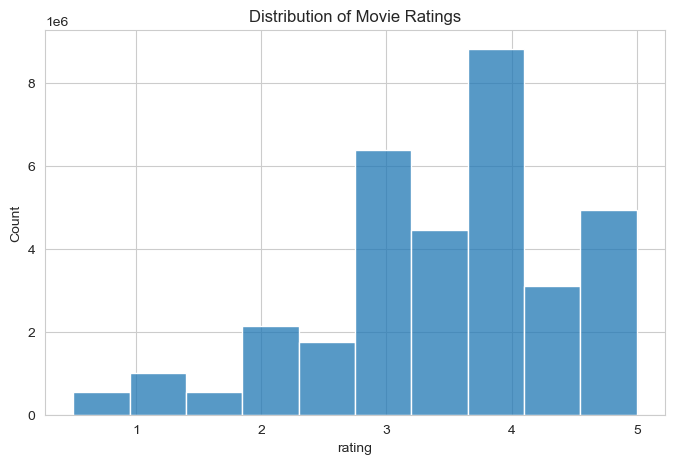

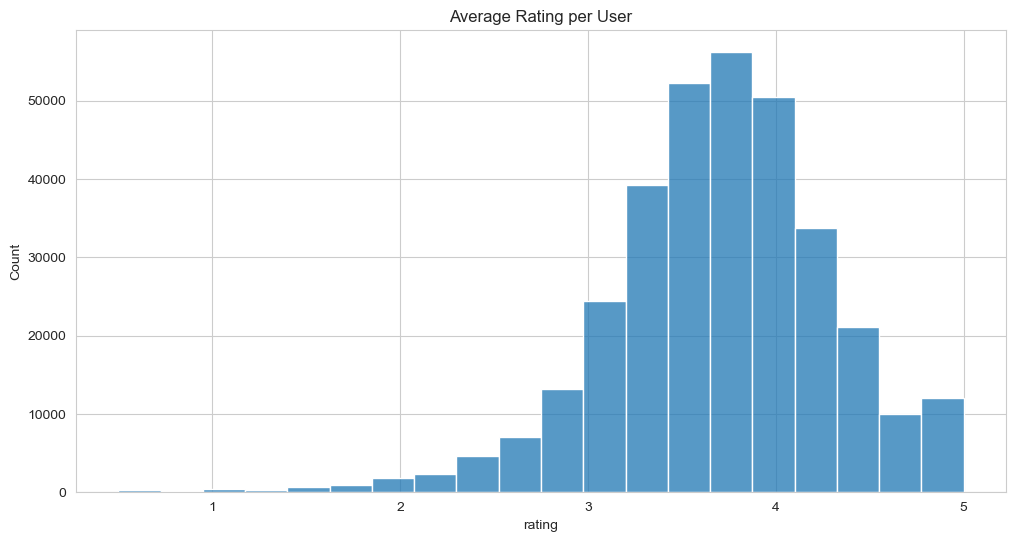

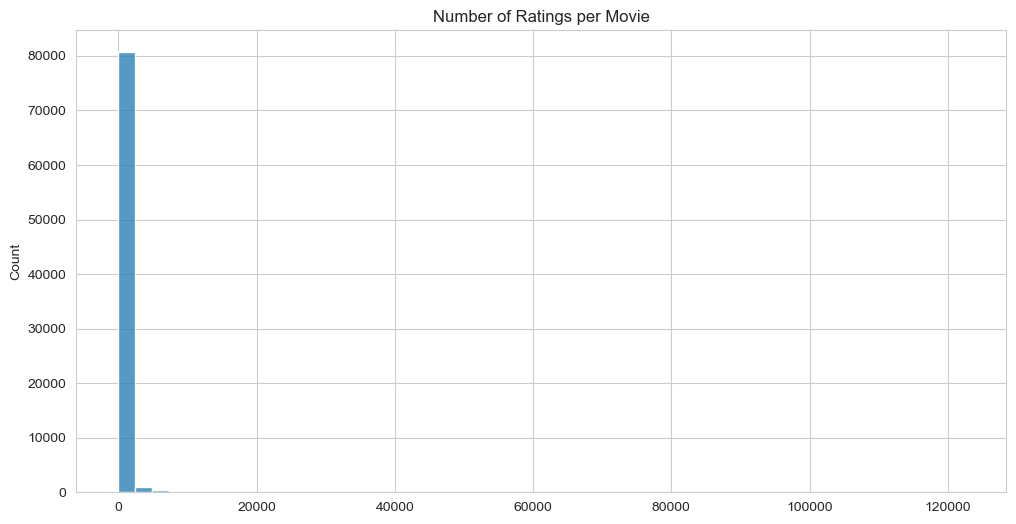

,Genre,Count
0,r,124034
1,e,104474
2,a,102398
3,m,87816
4,o,80981
5,n,67523
6,|,65751
7,i,60207
8,t,45317
9,y,43878


In [80]:
plt.figure(figsize=(8,5))
sns.histplot(ratings['rating'], bins=10)
plt.title("Distribution of Movie Ratings")
plt.show()

user_avg = ratings.groupby('userId')['rating'].mean()

sns.histplot(user_avg, bins=20)
plt.title("Average Rating per User")
plt.show()

movie_stats = ratings.groupby('movieId').size()

sns.histplot(movie_stats, bins=50)
plt.title("Number of Ratings per Movie")
plt.show()

from collections import Counter

genre_counts = Counter([g for sub in movies['genres'].dropna() for g in sub])
pd.DataFrame(genre_counts.most_common(10), columns=['Genre','Count'])



1. RATER TYPE DISTRIBUTION:
rater_type
Balanced         120152
Critical          76040
Generous          74094
Harsh             32656
Very Generous     28033
Name: count, dtype: int64

Mean ratings by type:
rater_type
Harsh            2.529456
Critical         3.273269
Balanced         3.734129
Generous         4.184341
Very Generous    4.751391
Name: avg_rating, dtype: float64


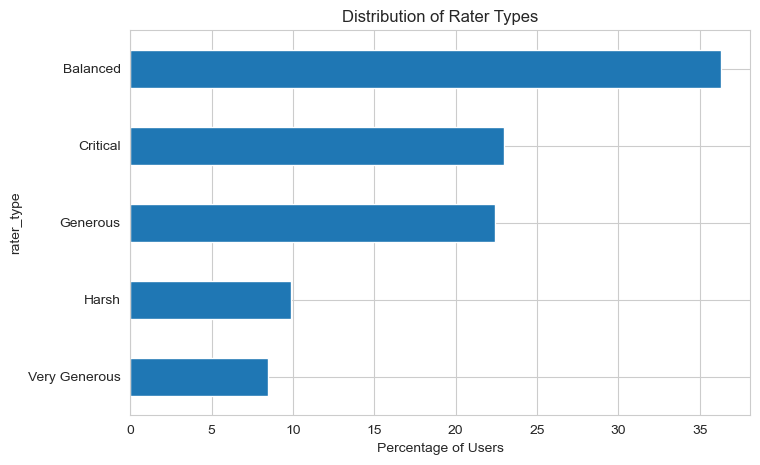

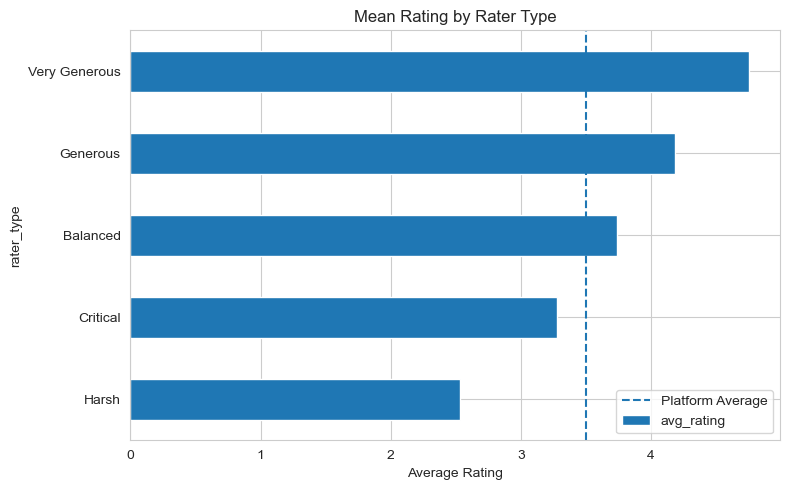

In [81]:
# 2.1 Who are "harsh" vs "generous" raters?
user_stats = ratings.groupby('userId').agg({
    'rating': ['mean', 'count', 'std']
}).reset_index()
user_stats.columns = ['userId', 'avg_rating', 'num_ratings', 'std_rating']

# Classify users
def classify_rater(avg_rating):
    if avg_rating < 3.0:
        return 'Harsh'
    elif avg_rating < 3.5:
        return 'Critical'
    elif avg_rating < 4.0:
        return 'Balanced'
    elif avg_rating < 4.5:
        return 'Generous'
    else:
        return 'Very Generous'

user_stats['rater_type'] = user_stats['avg_rating'].apply(classify_rater)

# Distribution of rater types
rater_distribution = user_stats['rater_type'].value_counts()
print("\n1. RATER TYPE DISTRIBUTION:")
print(rater_distribution)
print(f"\nMean ratings by type:")
print(user_stats.groupby('rater_type')['avg_rating'].mean().sort_values())

fig, ax = plt.subplots(figsize=(8, 5))

rater_dist_pct = (rater_distribution / len(user_stats) * 100).sort_values()
rater_dist_pct.plot(kind='barh', ax=ax)

ax.set_xlabel('Percentage of Users')
ax.set_title('Distribution of Rater Types')

plt.show()

# Plot 2: Average rating by type
fig, ax = plt.subplots(figsize=(8, 5))

user_stats.groupby('rater_type')['avg_rating'].mean().sort_values().plot(
    kind='barh', ax=ax
)

ax.set_xlabel('Average Rating')
ax.set_title('Mean Rating by Rater Type')
ax.axvline(x=3.5, linestyle='--', label='Platform Average')
ax.legend()

plt.tight_layout()
plt.savefig('rater_types.png', dpi=300, bbox_inches='tight')
plt.show()


## B.2: Rating Analysis Functions 


2. RATING EVOLUTION OVER TIME:
    year  avg_rating  num_ratings
19  2014    3.601572       566628
20  2015    3.578271      1853975
21  2016    3.548367      2005979
22  2017    3.562181      1899523
23  2018    3.582864      1455193
24  2019    3.593879      1450218
25  2020    3.608508      1763532
26  2021    3.596874      1297525
27  2022    3.517503       953347
28  2023    3.574917       562624


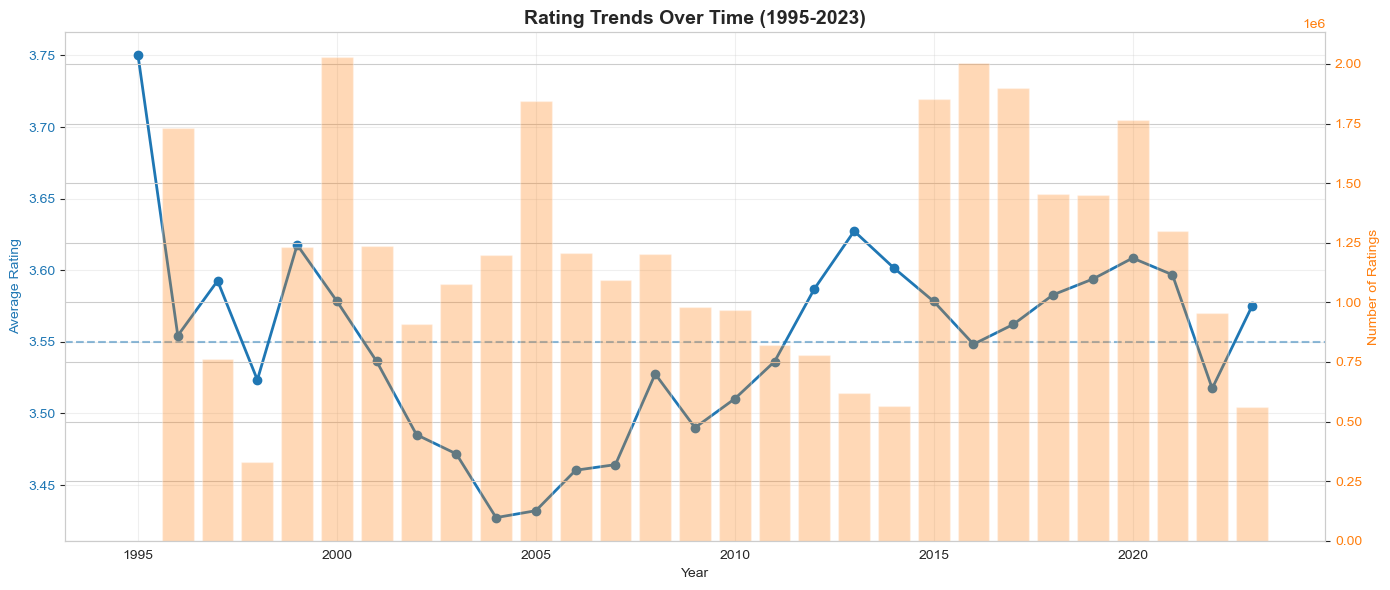

In [82]:
# 2.2 Rating evolution over time
print("\n2. RATING EVOLUTION OVER TIME:")
yearly_stats = ratings.groupby('year').agg({
    'rating': ['mean', 'count']
}).reset_index()
yearly_stats.columns = ['year', 'avg_rating', 'num_ratings']

print(yearly_stats[['year', 'avg_rating', 'num_ratings']].tail(10))
# Visualization
fig, ax1 = plt.subplots(figsize=(14, 6))

color1 = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Rating', color=color1)
ax1.plot(yearly_stats['year'], yearly_stats['avg_rating'],
         color=color1, marker='o', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.axhline(y=yearly_stats['avg_rating'].mean(), color=color1,
            linestyle='--', alpha=0.5, label='Overall Mean')
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('Number of Ratings', color=color2)
ax2.bar(yearly_stats['year'], yearly_stats['num_ratings'],
        alpha=0.3, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Rating Trends Over Time (1995-2023)', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.savefig('rating_evolution.png', dpi=300, bbox_inches='tight')
plt.show()

## B.2: Retention Analysis Functions 


3. USER RETENTION ANALYSIS:
        cohort  num_users  avg_ratings_per_user
0    1-2 years       9505            264.495423
1   1-3 months      11302            172.425765
2     2+ years      20489            493.382205
3   3-6 months       8183            189.358426
4  6-12 months       9450            210.411429
5    < 1 month     272046             57.793759


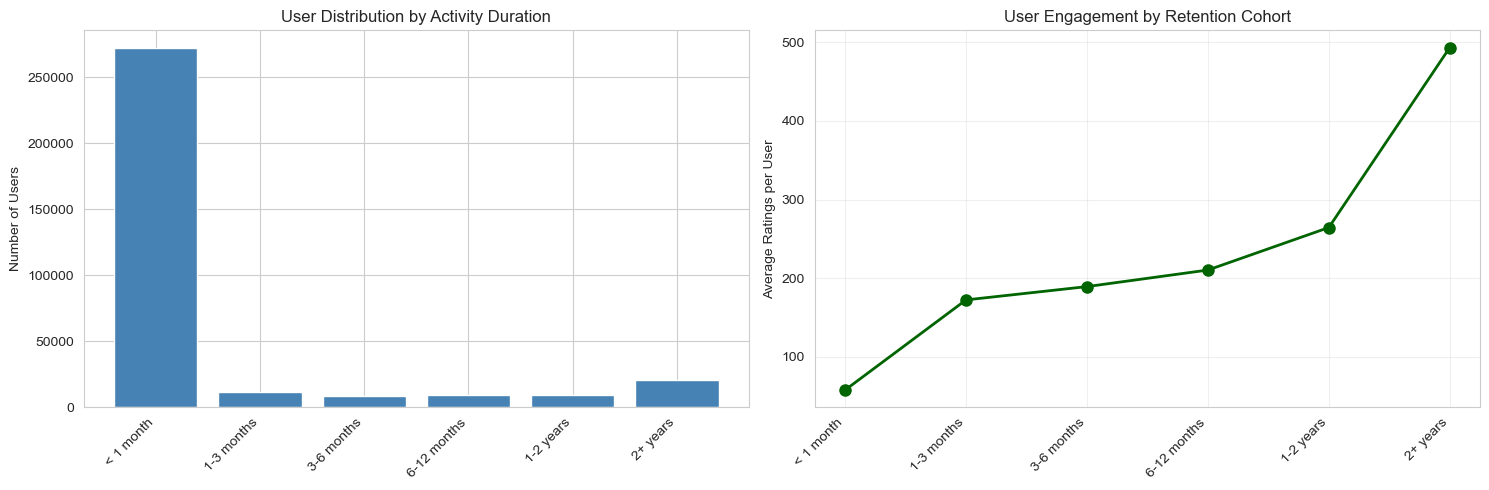

In [83]:
# 2.3 User retention analysis
print("\n3. USER RETENTION ANALYSIS:")


# Calculate user activity timeline
user_first_rating = ratings.groupby('userId')['timestamp'].min().reset_index()
user_first_rating.columns = ['userId', 'first_rating_date']

user_last_rating = ratings.groupby('userId')['timestamp'].max().reset_index()
user_last_rating.columns = ['userId', 'last_rating_date']

user_activity = user_first_rating.merge(user_last_rating, on='userId')
user_activity = user_activity.merge(user_stats[['userId', 'num_ratings']], on='userId')
user_activity['days_active'] = (user_activity['last_rating_date'] -
                                  user_activity['first_rating_date']).dt.days

# Retention cohorts
user_activity['activity_months'] = user_activity['days_active'] / 30

def cohort_bucket(months):
    if months < 1:
        return '< 1 month'
    elif months < 3:
        return '1-3 months'
    elif months < 6:
        return '3-6 months'
    elif months < 12:
        return '6-12 months'
    elif months < 24:
        return '1-2 years'
    else:
        return '2+ years'

user_activity['cohort'] = user_activity['activity_months'].apply(cohort_bucket)

retention_stats = user_activity.groupby('cohort').agg({
    'userId': 'count',
    'num_ratings': 'mean'
}).reset_index()
retention_stats.columns = ['cohort', 'num_users', 'avg_ratings_per_user']

print(retention_stats)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

cohort_order = ['< 1 month', '1-3 months', '3-6 months', '6-12 months', '1-2 years', '2+ years']
retention_ordered = retention_stats.set_index('cohort').reindex(cohort_order).reset_index()

axes[0].bar(range(len(retention_ordered)), retention_ordered['num_users'], color='steelblue')
axes[0].set_xticks(range(len(retention_ordered)))
axes[0].set_xticklabels(retention_ordered['cohort'], rotation=45, ha='right')
axes[0].set_ylabel('Number of Users')
axes[0].set_title('User Distribution by Activity Duration')

axes[1].plot(range(len(retention_ordered)), retention_ordered['avg_ratings_per_user'],
             marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[1].set_xticks(range(len(retention_ordered)))
axes[1].set_xticklabels(retention_ordered['cohort'], rotation=45, ha='right')
axes[1].set_ylabel('Average Ratings per User')
axes[1].set_title('User Engagement by Retention Cohort')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('user_retention.png', dpi=300, bbox_inches='tight')
plt.show()

## B.3: Genre Analysis Functions


1. GENRE PERFORMANCE:
                                                genre  avg_rating  \
224         Action|Adventure|Mystery|Romance|Thriller    4.187337   
461   Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX    4.176187   
456                           Action|Crime|Drama|IMAX    4.169199   
728                       Adventure|Animation|Fantasy    4.167057   
139             Action|Adventure|Crime|Drama|Thriller    4.156076   
1707                       Film-Noir|Romance|Thriller    4.149450   
1765                                      Sci-Fi|IMAX    4.146972   
1011                 Animation|Children|Drama|Fantasy    4.141212   
33           Action|Adventure|Animation|Drama|Fantasy    4.132303   
733               Adventure|Animation|Fantasy|Romance    4.115707   

      num_ratings  std_rating  
224         21883    0.784884  
461         65056    0.842369  
456         66289    0.912402  
728         37571    0.949675  
139         27948    0.867820  
1707         6186    0.79

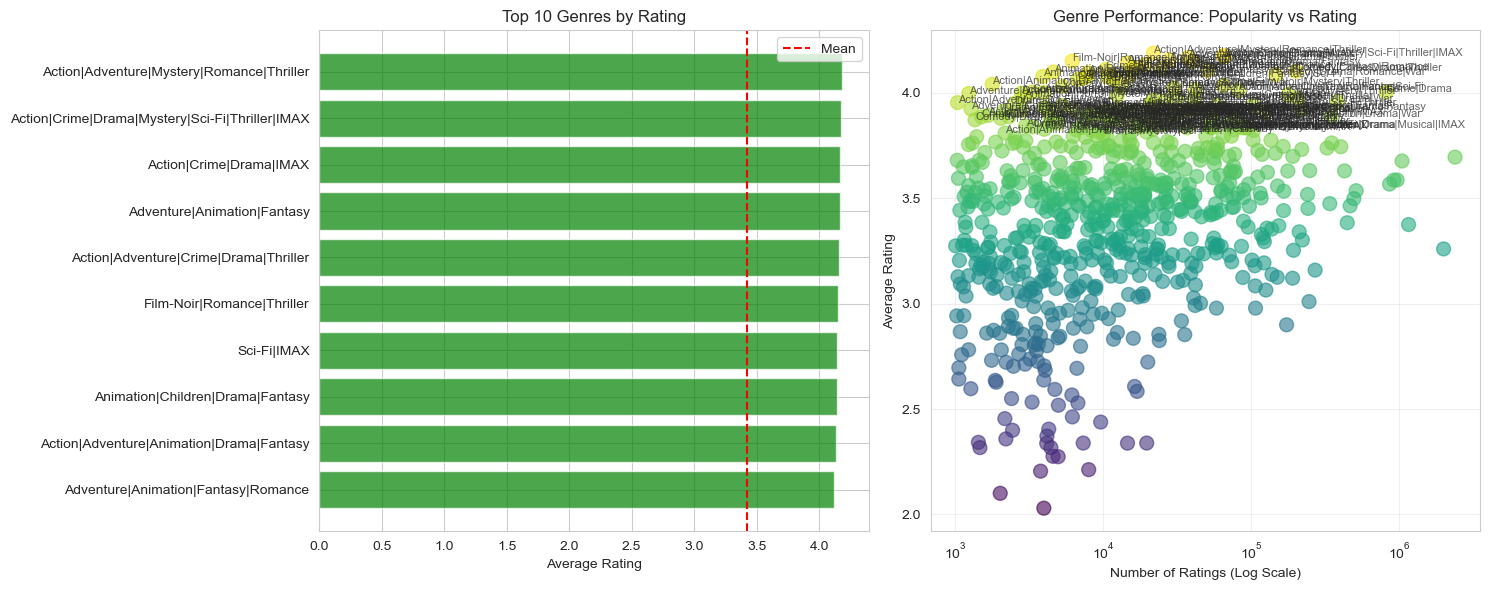

In [84]:
# 3.1 Genre performance
print("\n1. GENRE PERFORMANCE:")

# Explore genres for analysis
movies_exploded = movies.explode('genres')
movies_exploded = movies_exploded[movies_exploded['genres'] != '(no genres listed)']

# Merge with ratings
genre_ratings = movies_exploded.merge(ratings[['userId', 'movieId', 'rating']], on='movieId')

genre_stats = genre_ratings.groupby('genres').agg({
    'rating': ['mean', 'count', 'std']
}).reset_index()
genre_stats.columns = ['genre', 'avg_rating', 'num_ratings', 'std_rating']
genre_stats = genre_stats[genre_stats['num_ratings'] >= 1000]  # Filter for significance
genre_stats = genre_stats.sort_values('avg_rating', ascending=False)

print(genre_stats.head(10))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Top genres by rating
top_genres = genre_stats.sort_values('avg_rating', ascending=True).tail(10)
axes[0].barh(range(len(top_genres)), top_genres['avg_rating'], color='green', alpha=0.7)
axes[0].set_yticks(range(len(top_genres)))
axes[0].set_yticklabels(top_genres['genre'])
axes[0].set_xlabel('Average Rating')
axes[0].set_title('Top 10 Genres by Rating')
axes[0].axvline(x=genre_stats['avg_rating'].mean(), color='red', linestyle='--', label='Mean')
axes[0].legend()

# Genre scatter: popularity vs rating
axes[1].scatter(genre_stats['num_ratings'], genre_stats['avg_rating'],
                s=100, alpha=0.6, c=genre_stats['avg_rating'], cmap='viridis')
axes[1].set_xlabel('Number of Ratings (Log Scale)')
axes[1].set_ylabel('Average Rating')
axes[1].set_xscale('log')
axes[1].set_title('Genre Performance: Popularity vs Rating')
axes[1].grid(True, alpha=0.3)

# Annotate interesting genres
for idx, row in genre_stats.iterrows():
    if row['avg_rating'] > 3.8 or row['num_ratings'] > 5000000:
        axes[1].annotate(row['genre'], (row['num_ratings'], row['avg_rating']),
                        fontsize=8, alpha=0.7)

plt.tight_layout()
plt.savefig('genre_performance.png', dpi=300, bbox_inches='tight')
plt.show()


## B.4: Tag Driven Analysis Functions 


2. TAG SENTIMENT ANALYSIS:
                       tag  avg_rating  frequency
93188               sci-fi    3.990826      13407
34717          atmospheric    4.241117      11820
31218               action    3.880466       9993
45272               comedy    3.936959       9351
101600             surreal    4.221964       8819
58698                funny    4.088312       8770
108747  visually appealing    4.174034       8642
106381        twist ending    4.251520       8061
103943   thought-provoking    4.393652       7499
48139          dark comedy    4.212288       7186
51910             dystopia    3.940778       6636
36475      based on a book    3.868765       6435
44039       cinematography    4.219087       6308
97815    social commentary    4.175643       6146
100919            stylized    4.163577       5933


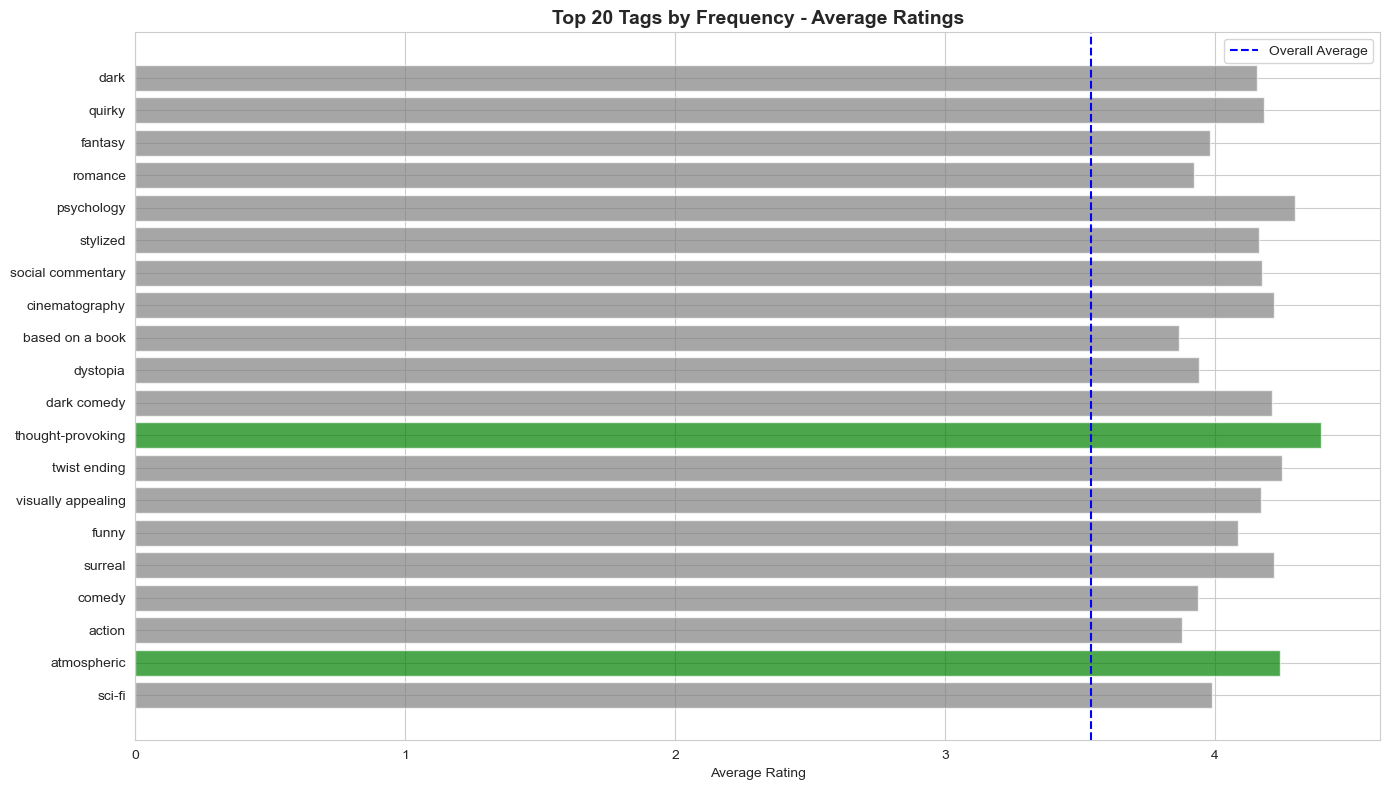

In [85]:
# 3.2 Tag-driven analytics
print("\n2. TAG SENTIMENT ANALYSIS:")

# Merge tags with ratings
tags_with_ratings = tags.merge(ratings[['userId', 'movieId', 'rating']],
                                on=['userId', 'movieId'])

# Get most common tags
tag_stats = tags_with_ratings.groupby('tag').agg({
    'rating': ['mean', 'count']
}).reset_index()
tag_stats.columns = ['tag', 'avg_rating', 'frequency']
tag_stats = tag_stats[tag_stats['frequency'] >= 50]  # Minimum frequency
tag_stats = tag_stats.sort_values('frequency', ascending=False).head(30)

print(tag_stats.head(15))

# Categorize tags
positive_tags = ['great', 'excellent', 'classic', 'atmospheric', 'thought-provoking',
                 'masterpiece', 'underrated', 'brilliant']
negative_tags = ['boring', 'overrated', 'predictable', 'bad', 'disappointing']

tag_stats['sentiment'] = 'Neutral'
tag_stats.loc[tag_stats['tag'].str.lower().isin(positive_tags), 'sentiment'] = 'Positive'
tag_stats.loc[tag_stats['tag'].str.lower().isin(negative_tags), 'sentiment'] = 'Negative'

# Visualization
plt.figure(figsize=(14, 8))
sentiment_colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}
colors = [sentiment_colors[s] for s in tag_stats.head(20)['sentiment']]

plt.barh(range(len(tag_stats.head(20))), tag_stats.head(20)['avg_rating'], color=colors, alpha=0.7)
plt.yticks(range(len(tag_stats.head(20))), tag_stats.head(20)['tag'])
plt.xlabel('Average Rating')
plt.title('Top 20 Tags by Frequency - Average Ratings', fontsize=14, fontweight='bold')
plt.axvline(x=ratings['rating'].mean(), color='blue', linestyle='--', label='Overall Average')
plt.legend()
plt.tight_layout()
plt.savefig('tag_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

## B.4: Hidden Patterns


HIDDEN PATTERNS

1. RELEASE YEAR IMPACT:
    decade  avg_rating  num_ratings
5     1920    3.769081        50942
6     1930    3.780088       243106
7     1940    3.851151       385368
8     1950    3.838763       634377
9     1960    3.786603       933624
10    1970    3.774101      1643104
11    1980    3.574306      4053704
12    1990    3.482881     11617228
13    2000    3.497178      9296762
14    2010    3.554438      4670767
15    2020    3.343929       258472


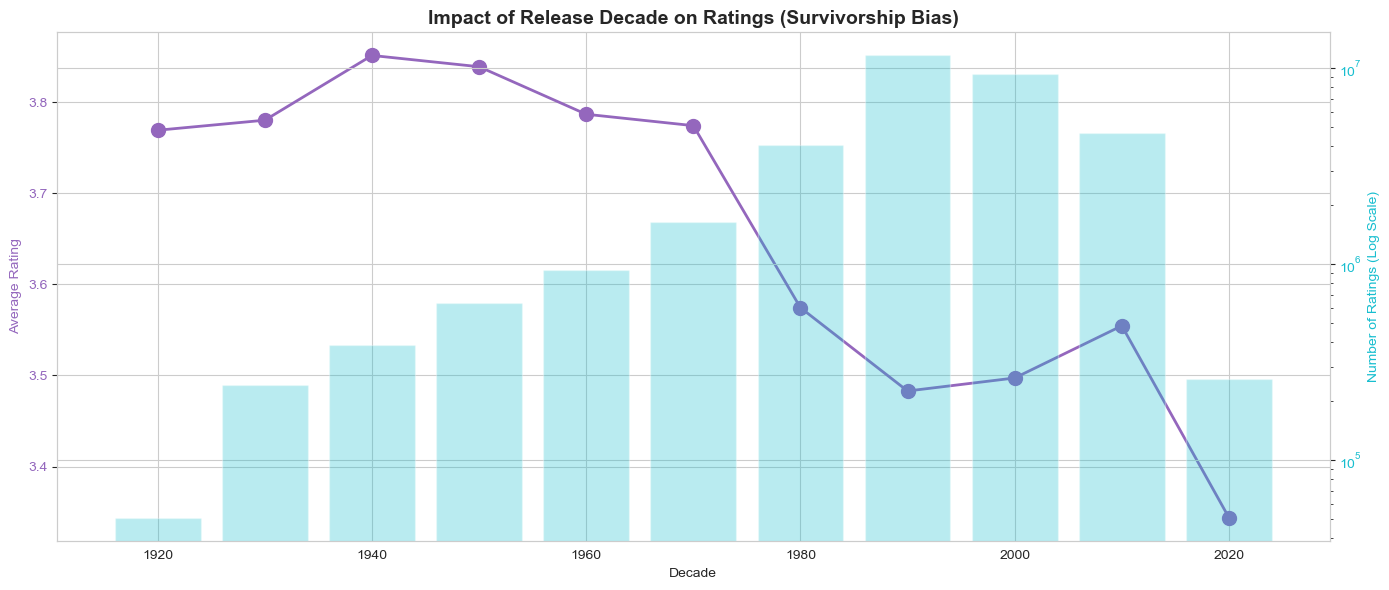

In [88]:
print("\n" + "="*70)
print("HIDDEN PATTERNS")
print("="*70)

# 4.1 Release year impact
print("\n1. RELEASE YEAR IMPACT:")

# Extract release year from title
movies['release_year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(float)

movies_with_year = movies[movies['release_year'].notna()].copy()
movies_with_year['decade'] = (movies_with_year['release_year'] // 10 * 10).astype(int)

# Merge with ratings
year_ratings = movies_with_year[['movieId', 'release_year', 'decade']].merge(
    ratings[['movieId', 'rating']], on='movieId'
)

decade_stats = year_ratings.groupby('decade').agg({
    'rating': ['mean', 'count']
}).reset_index()
decade_stats.columns = ['decade', 'avg_rating', 'num_ratings']
decade_stats = decade_stats[decade_stats['decade'] >= 1920]

print(decade_stats)

# Visualization
fig, ax1 = plt.subplots(figsize=(14, 6))

color1 = 'tab:purple'
ax1.set_xlabel('Decade')
ax1.set_ylabel('Average Rating', color=color1)
ax1.plot(decade_stats['decade'], decade_stats['avg_rating'],
         color=color1, marker='o', linewidth=2, markersize=10)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:cyan'
ax2.set_ylabel('Number of Ratings (Log Scale)', color=color2)
ax2.bar(decade_stats['decade'], decade_stats['num_ratings'],
        alpha=0.3, color=color2, width=8)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Impact of Release Decade on Ratings (Survivorship Bias)',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('release_year_impact.png', dpi=300, bbox_inches='tight')
plt.show()

In [86]:
# 4.2 Hidden gems
print("\n2. HIDDEN GEMS (High Rating, Low Visibility):")

movie_stats = ratings.groupby('movieId').agg({
    'rating': ['mean', 'count']
}).reset_index()
movie_stats.columns = ['movieId', 'avg_rating', 'num_ratings']

# Define hidden gems: high rating (>4.0), low visibility (<1000 ratings)
hidden_gems = movie_stats[
    (movie_stats['avg_rating'] >= 4.0) &
    (movie_stats['num_ratings'] >= 50) &  # Minimum for significance
    (movie_stats['num_ratings'] <= 1000)
].sort_values('avg_rating', ascending=False)

hidden_gems = hidden_gems.merge(movies[['movieId', 'title', 'genres']], on='movieId')

print("\nTop 15 Hidden Gems:")
print(hidden_gems[['title', 'genres', 'avg_rating', 'num_ratings']].head(15))



2. HIDDEN GEMS (High Rating, Low Visibility):

Top 15 Hidden Gems:
                                                title  \
0                                              Cosmos   
1                             Twelve Angry Men (1954)   
2                         Cosmos: A Spacetime Odissey   
3          Spider-Man: Across the Spider-Verse (2023)   
4                     Century of the Self, The (2002)   
5                          Pride and Prejudice (1980)   
6                    It's Such a Beautiful Day (2011)   
7                                 Human Planet (2011)   
8                                      Firefly (2002)   
9                              Isle of Flowers (1989)   
10                    Decalogue, The (Dekalog) (1989)   
11  Ghost in the Shell: Stand Alone Complex - Indi...   
12              Can't Change the Meeting Place (1979)   
13                        There Once Was a Dog (1982)   
14                        I Am So Proud of You (2008)   

                   


3. USER TASTE PROFILE CLUSTERING:

User Distribution by Favorite Genre:
genres
Action|Adventure                              16281
Action|Adventure|Sci-Fi                       11379
Action|Adventure|Drama|Fantasy                11248
Action|Adventure|Comedy|Fantasy|Romance       10029
Action|Drama|War                               8338
Action|Adventure|Drama                         8238
Action|Crime|Drama|Thriller                    7964
Crime|Drama                                    7333
Action|Adventure|Sci-Fi|Thriller               5854
Action|Adventure|Animation|Children|Comedy     5634
Name: count, dtype: int64


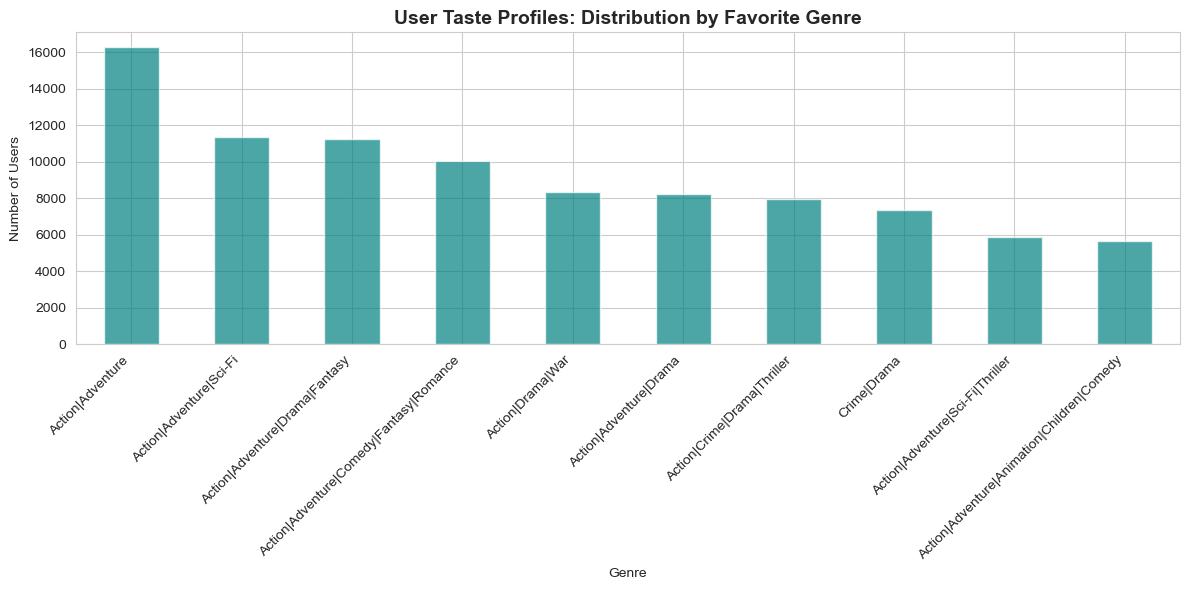

In [89]:
# 4.3 User taste clusters (genre affinity)
print("\n3. USER TASTE PROFILE CLUSTERING:")

# Create user-genre matrix
user_genre_ratings = genre_ratings.groupby(['userId', 'genres']).agg({
    'rating': 'mean'
}).reset_index()

# Get top genre for each user
user_top_genre = user_genre_ratings.loc[
    user_genre_ratings.groupby('userId')['rating'].idxmax()
]

# Count users by favorite genre
genre_preference = user_top_genre['genres'].value_counts().head(10)
print("\nUser Distribution by Favorite Genre:")
print(genre_preference)

# Visualization
plt.figure(figsize=(12, 6))
genre_preference.plot(kind='bar', color='teal', alpha=0.7)
plt.xlabel('Genre')
plt.ylabel('Number of Users')
plt.title('User Taste Profiles: Distribution by Favorite Genre', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('user_taste_clusters.png', dpi=300, bbox_inches='tight')
plt.show()


---
# SECTION C.1: NON-PERSONALIZED BASELINE RECOMMENDATION SYSTEM
---

This section implements a non-personalized baseline recommendation system using:
- IMDB-style weighted popularity score
- Global top-N recommendations
- Genre and time-period filtering

## C.1: Baseline Recommendation Functions

BASELINE RECOMMENDATION SYSTEM
✓ Movie statistics calculated
  - Total movies with ratings: 83,239
  - Global mean rating: 3.543

Sample statistics:
   movieId  avg_rating  rating_count  std_rating  min_rating  max_rating  \
0        1    3.893508         76813    0.929105         0.5         5.0   
1        2    3.278179         30209    0.958721         0.5         5.0   
2        3    3.171271         15820    1.016060         0.5         5.0   
3        4    2.868395          3028    1.112859         0.5         5.0   
4        5    3.076957         15801    0.999570         0.5         5.0   

                                title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  


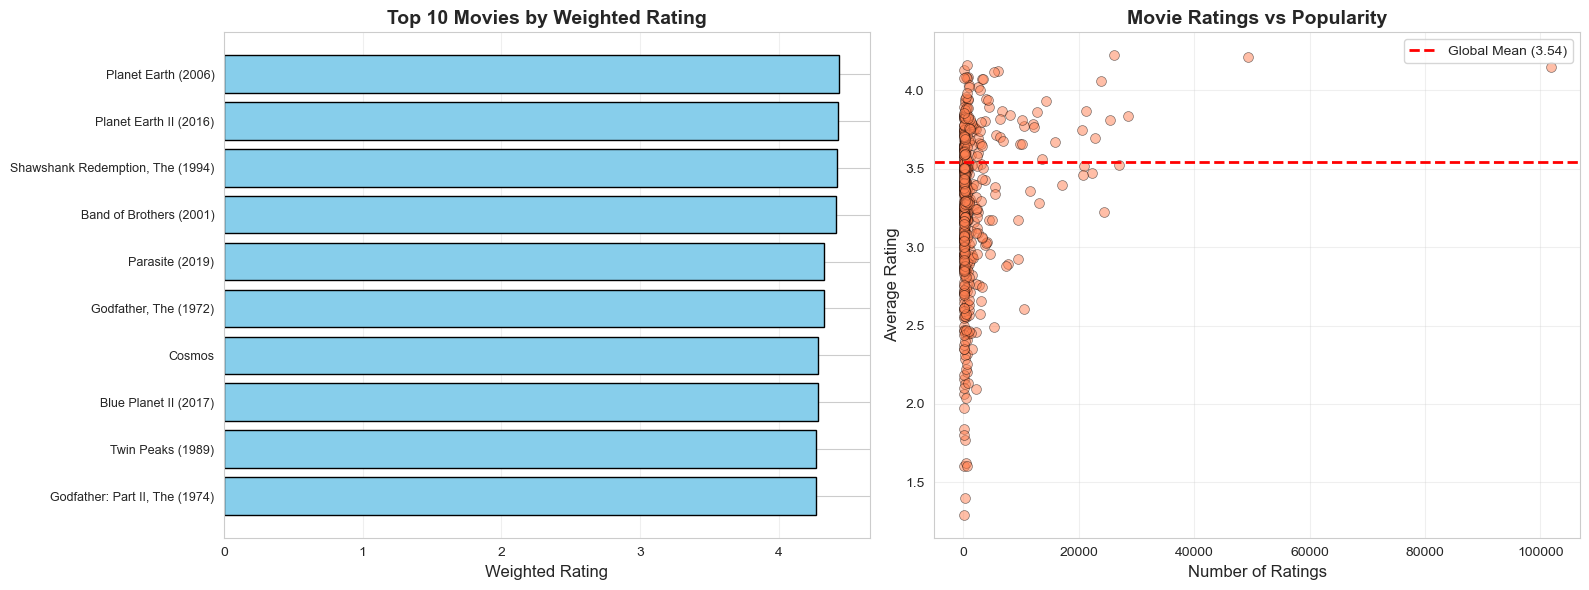

BASELINE SYSTEM SUMMARY

Dataset Statistics:
  - Total movies: 83,239
  - Movies with ≥50 ratings: 16,116
  - Global mean rating: 3.543

Recommendation Criteria:
  - Weighted rating formula: (v/(v+m)) * R + (m/(v+m)) * C
  - Minimum votes (m): 50
  - Filters out movies with <50 ratings

Top Rated Movie:
  - Planet Earth (2006)
  - Rating: 4.45/5.0 (3015 ratings)
  - Weighted Score: 4.433

Most Popular Movie:
  - Shawshank Redemption, The (1994)
  - 122,296 ratings
  - Rating: 4.42/5.0

✓ Section C.1 Complete: Non-Personalized Baseline System


In [90]:
# ============================================================================
# SECTION C.1: NON-PERSONALIZED BASELINE RECOMMENDATION SYSTEM
# ============================================================================

print("=" * 80)
print("BASELINE RECOMMENDATION SYSTEM")
print("=" * 80)

# Calculate statistics for each movie
movie_stats = ratings.groupby('movieId').agg({
    'rating': ['mean', 'count', 'std', 'min', 'max']
}).reset_index()

movie_stats.columns = ['movieId', 'avg_rating', 'rating_count', 'std_rating', 'min_rating', 'max_rating']

# Merge with movie titles and genres
movie_stats = movie_stats.merge(movies[['movieId', 'title', 'genres']], on='movieId', how='left')

# Calculate global mean rating
global_mean = ratings['rating'].mean()

print(f"✓ Movie statistics calculated")
print(f"  - Total movies with ratings: {len(movie_stats):,}")
print(f"  - Global mean rating: {global_mean:.3f}")
print(f"\nSample statistics:")
print(movie_stats.head())

# Calculate weighted rating using IMDB formula
# WR = (v/(v+m)) * R + (m/(v+m)) * C
# Where:
# v = number of votes for the movie
# m = minimum votes required (we'll use 50)
# R = average rating for the movie
# C = mean vote across all movies (global mean)

min_votes = 50

movie_stats['weighted_rating'] = (
    (movie_stats['rating_count'] / (movie_stats['rating_count'] + min_votes)) * movie_stats['avg_rating'] +
    (min_votes / (movie_stats['rating_count'] + min_votes)) * global_mean
)

# Also calculate a combined score (70% quality, 30% popularity)
# Normalize rating count for popularity score
max_count = movie_stats['rating_count'].max()
movie_stats['popularity_score'] = movie_stats['rating_count'] / max_count

movie_stats['combined_score'] = (
    0.7 * (movie_stats['avg_rating'] / 5.0) + 
    0.3 * movie_stats['popularity_score']
)

print(f"✓ Weighted ratings calculated")
print(f"  - Minimum votes threshold: {min_votes}")
print(f"\nTop 5 movies by weighted rating:")
print(movie_stats.nlargest(5, 'weighted_rating')[['title', 'avg_rating', 'rating_count', 'weighted_rating']])

# Get top 10 movies by weighted rating (with minimum vote threshold)
top_10_overall = movie_stats[movie_stats['rating_count'] >= min_votes].nlargest(10, 'weighted_rating')

print("=" * 80)
print("TOP 10 MOVIES - OVERALL (Weighted Rating)")
print("=" * 80)
print(f"Criteria: Minimum {min_votes} ratings\n")

for idx, row in top_10_overall.iterrows():
    print(f"{list(top_10_overall.index).index(idx) + 1}. {row['title']}")
    print(f"   Rating: {row['avg_rating']:.2f}/5.0 ({int(row['rating_count'])} ratings)")
    print(f"   Weighted Score: {row['weighted_rating']:.3f}")
    print(f"   Genres: {', '.join(row['genres']) if isinstance(row['genres'], list) else row['genres']}")
    print()

# Get top 10 movies by combined score
top_10_combined = movie_stats[movie_stats['rating_count'] >= min_votes].nlargest(10, 'combined_score')

print("=" * 80)
print("TOP 10 MOVIES - COMBINED SCORE (70% Quality + 30% Popularity)")
print("=" * 80)
print(f"Criteria: Minimum {min_votes} ratings\n")

for idx, row in top_10_combined.iterrows():
    print(f"{list(top_10_combined.index).index(idx) + 1}. {row['title']}")
    print(f"   Rating: {row['avg_rating']:.2f}/5.0 ({int(row['rating_count'])} ratings)")
    print(f"   Combined Score: {row['combined_score']:.3f}")
    print(f"   Genres: {', '.join(row['genres']) if isinstance(row['genres'], list) else row['genres']}")
    print()

# Genre-specific recommendations
print("=" * 80)
print("GENRE-SPECIFIC RECOMMENDATIONS")
print("=" * 80)

# Function to check if a genre is in the movie's genre list
def has_genre(genres_list, target_genre):
    if isinstance(genres_list, list):
        return target_genre in genres_list
    return False

# Top Action movies
print("\nTOP 5 ACTION MOVIES:")
action_movies = movie_stats[movie_stats['genres'].apply(lambda x: has_genre(x, 'Action'))]
action_movies = action_movies[action_movies['rating_count'] >= 30].nlargest(5, 'weighted_rating')

for idx, row in action_movies.iterrows():
    print(f"  {list(action_movies.index).index(idx) + 1}. {row['title']} - Rating: {row['avg_rating']:.2f}")

# Top Comedy movies
print("\nTOP 5 COMEDY MOVIES:")
comedy_movies = movie_stats[movie_stats['genres'].apply(lambda x: has_genre(x, 'Comedy'))]
comedy_movies = comedy_movies[comedy_movies['rating_count'] >= 30].nlargest(5, 'weighted_rating')

for idx, row in comedy_movies.iterrows():
    print(f"  {list(comedy_movies.index).index(idx) + 1}. {row['title']} - Rating: {row['avg_rating']:.2f}")

# Top Drama movies
print("\nTOP 5 DRAMA MOVIES:")
drama_movies = movie_stats[movie_stats['genres'].apply(lambda x: has_genre(x, 'Drama'))]
drama_movies = drama_movies[drama_movies['rating_count'] >= 30].nlargest(5, 'weighted_rating')

for idx, row in drama_movies.iterrows():
    print(f"  {list(drama_movies.index).index(idx) + 1}. {row['title']} - Rating: {row['avg_rating']:.2f}")

# Top Sci-Fi movies
print("\nTOP 5 SCI-FI MOVIES:")
scifi_movies = movie_stats[movie_stats['genres'].apply(lambda x: has_genre(x, 'Sci-Fi'))]
scifi_movies = scifi_movies[scifi_movies['rating_count'] >= 30].nlargest(5, 'weighted_rating')

for idx, row in scifi_movies.iterrows():
    print(f"  {list(scifi_movies.index).index(idx) + 1}. {row['title']} - Rating: {row['avg_rating']:.2f}")

# Evaluate baseline system performance
print("=" * 80)
print("BASELINE SYSTEM EVALUATION")
print("=" * 80)

# For movies with sufficient ratings, compare predictions to actual ratings
eval_movies = movie_stats[movie_stats['rating_count'] >= min_votes].copy()

# Use weighted_rating as our "prediction"
eval_movies['prediction'] = eval_movies['weighted_rating']
eval_movies['actual'] = eval_movies['avg_rating']

# Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(eval_movies['actual'], eval_movies['prediction']))
mae = mean_absolute_error(eval_movies['actual'], eval_movies['prediction'])

# Calculate baseline (always predict global mean)
baseline_predictions = [global_mean] * len(eval_movies)
baseline_rmse = np.sqrt(mean_squared_error(eval_movies['actual'], baseline_predictions))
baseline_mae = mean_absolute_error(eval_movies['actual'], baseline_predictions)

print(f"\nWeighted Rating System:")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")

print(f"\nNaive Baseline (Global Mean):")
print(f"  RMSE: {baseline_rmse:.4f}")
print(f"  MAE: {baseline_mae:.4f}")

print(f"\nImprovement over baseline:")
print(f"  RMSE improvement: {((baseline_rmse - rmse) / baseline_rmse * 100):.2f}%")
print(f"  MAE improvement: {((baseline_mae - mae) / baseline_mae * 100):.2f}%")

print(f"\n✓ Baseline recommendation system complete!")

# Visualize top 10 recommendations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Top 10 by weighted rating
top_10_plot = top_10_overall.sort_values('weighted_rating')
axes[0].barh(range(len(top_10_plot)), top_10_plot['weighted_rating'], color='skyblue', edgecolor='black')
axes[0].set_yticks(range(len(top_10_plot)))
axes[0].set_yticklabels([title[:40] + '...' if len(title) > 40 else title 
                          for title in top_10_plot['title']], fontsize=9)
axes[0].set_xlabel('Weighted Rating', fontsize=12)
axes[0].set_title('Top 10 Movies by Weighted Rating', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Rating vs Rating Count
scatter_data = movie_stats[movie_stats['rating_count'] >= min_votes].sample(min(500, len(movie_stats)))
axes[1].scatter(scatter_data['rating_count'], scatter_data['avg_rating'], 
               alpha=0.5, s=50, color='coral', edgecolor='black', linewidth=0.5)
axes[1].set_xlabel('Number of Ratings', fontsize=12)
axes[1].set_ylabel('Average Rating', fontsize=12)
axes[1].set_title('Movie Ratings vs Popularity', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)
axes[1].axhline(y=global_mean, color='red', linestyle='--', linewidth=2, label=f'Global Mean ({global_mean:.2f})')
axes[1].legend()

plt.tight_layout()
plt.show()

# Summary of baseline system
print("=" * 80)
print("BASELINE SYSTEM SUMMARY")
print("=" * 80)

print(f"\nDataset Statistics:")
print(f"  - Total movies: {len(movie_stats):,}")
print(f"  - Movies with ≥{min_votes} ratings: {len(movie_stats[movie_stats['rating_count'] >= min_votes]):,}")
print(f"  - Global mean rating: {global_mean:.3f}")

print(f"\nRecommendation Criteria:")
print(f"  - Weighted rating formula: (v/(v+m)) * R + (m/(v+m)) * C")
print(f"  - Minimum votes (m): {min_votes}")
print(f"  - Filters out movies with <{min_votes} ratings")

print(f"\nTop Rated Movie:")
top_movie = movie_stats[movie_stats['rating_count'] >= min_votes].nlargest(1, 'weighted_rating').iloc[0]
print(f"  - {top_movie['title']}")
print(f"  - Rating: {top_movie['avg_rating']:.2f}/5.0 ({int(top_movie['rating_count'])} ratings)")
print(f"  - Weighted Score: {top_movie['weighted_rating']:.3f}")

print(f"\nMost Popular Movie:")
most_popular = movie_stats.nlargest(1, 'rating_count').iloc[0]
print(f"  - {most_popular['title']}")
print(f"  - {int(most_popular['rating_count']):,} ratings")
print(f"  - Rating: {most_popular['avg_rating']:.2f}/5.0")

print("\n✓ Section C.1 Complete: Non-Personalized Baseline System")

---
# SECTION C.2: CONTENT-BASED ML MODELS
---

This section implements machine learning models for personalized movie rating prediction using content-based features:

**Models Implemented:**
1. **Ridge Regression** - Linear model with L2 regularization
2. **K-Nearest Neighbors (KNN)** - Instance-based learning
3. **Random Forest Regressor** - Ensemble tree-based model
4. **Logistic Regression** - Binary classification (thumbs up/down)

**Features Used:**
- Genre information (one-hot encoded)
- Movie popularity (log-transformed rating count)
- Average ratings

**Evaluation Metrics:**
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R² Score
- Accuracy (for binary classification)

---

In [92]:
# Feature Engineering: Create movie-level features

# Aggregate ratings by movie
movie_stats_ml = ratings_df.groupby('movieId').agg({
    'rating': ['mean', 'count']
}).reset_index()

movie_stats_ml.columns = ['movieId', 'avg_rating', 'rating_count']

# Filter movies with minimum ratings (quality threshold)
min_ratings_threshold = 50
modeling_df = movie_stats_ml[movie_stats_ml['rating_count'] >= min_ratings_threshold].copy()

print(f"Number of movies with >= {min_ratings_threshold} ratings: {len(modeling_df)}")

# Merge with movie metadata
modeling_df = modeling_df.merge(movies_df[['movieId', 'title', 'genres']], on='movieId')

# Parse genres into lists
modeling_df['genre_list'] = modeling_df['genres'].str.split('|')

# Create genre one-hot encoding
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
movie_genres_ohe = pd.DataFrame(
    mlb.fit_transform(modeling_df['genre_list']),
    columns=mlb.classes_,
    index=modeling_df.index
)

# Remove '(no genres listed)' if it exists
if '(no genres listed)' in movie_genres_ohe.columns:
    movie_genres_ohe = movie_genres_ohe.drop('(no genres listed)', axis=1)

print(f"Genre columns created: {list(movie_genres_ohe.columns)}")
print(f"Total genre features: {len(movie_genres_ohe.columns)}")

# Add log-transformed rating count (popularity feature)
modeling_df['log_rating_count'] = np.log1p(modeling_df['rating_count'])

print("\n✓ Feature engineering completed!")
print(f"Final dataset shape: {modeling_df.shape}")
print(f"Features: {len(movie_genres_ohe.columns)} genres + 1 popularity = {len(movie_genres_ohe.columns) + 1} total")

Number of movies with >= 50 ratings: 16116
Genre columns created: ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
Total genre features: 19

✓ Feature engineering completed!
Final dataset shape: (16116, 7)
Features: 19 genres + 1 popularity = 20 total


## C.2.3: Train-Test Split

Split the data into training (80%) and testing (20%) sets for model evaluation.
- **Training set**: Used to train the models
- **Test set**: Used to evaluate model performance on unseen data

In [93]:
# Prepare features (X) and target (y)
X = pd.concat([movie_genres_ohe, modeling_df[['log_rating_count']]], axis=1)
y = modeling_df['avg_rating']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {len(X_train)} movies")
print(f"Test set size: {len(X_test)} movies")
print(f"Number of features: {X_train.shape[1]}")
print(f"\nFeature names: {list(X_train.columns)}")

Training set size: 12892 movies
Test set size: 3224 movies
Number of features: 20

Feature names: ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'log_rating_count']


## C.2.4: Model 1 - Ridge Regression

**Ridge Regression** is a linear regression model with L2 regularization to prevent overfitting.

**Why Ridge?**
- Handles multicollinearity well (multiple genre features)
- Provides interpretable coefficients
- Fast training and prediction

**Hyperparameters:**
- `alpha=1.0`: Regularization strength

In [94]:
print("=" * 80)
print("MODEL 1: RIDGE REGRESSION")
print("=" * 80)

# Scale features for Ridge
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge Regression
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

# Predictions
ridge_train_pred = ridge_model.predict(X_train_scaled)
ridge_test_pred = ridge_model.predict(X_test_scaled)

# Evaluation
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_pred))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_pred))
ridge_train_mae = mean_absolute_error(y_train, ridge_train_pred)
ridge_test_mae = mean_absolute_error(y_test, ridge_test_pred)
ridge_r2 = r2_score(y_test, ridge_test_pred)

print(f"\n📊 Ridge Regression Results:")
print(f"  Training RMSE: {ridge_train_rmse:.4f}")
print(f"  Test RMSE: {ridge_test_rmse:.4f}")
print(f"  Training MAE: {ridge_train_mae:.4f}")
print(f"  Test MAE: {ridge_test_mae:.4f}")
print(f"  R² Score: {ridge_r2:.4f}")

print("\n✓ Ridge Regression training completed!")

MODEL 1: RIDGE REGRESSION

📊 Ridge Regression Results:
  Training RMSE: 0.3983
  Test RMSE: 0.4039
  Training MAE: 0.3074
  Test MAE: 0.3133
  R² Score: 0.2824

✓ Ridge Regression training completed!


## C.2.5: Model 2 - K-Nearest Neighbors (KNN)

**KNN** is an instance-based learning algorithm that predicts ratings based on similar movies.

**Why KNN?**
- Non-parametric (no assumptions about data distribution)
- Captures local patterns in feature space
- Good for finding similar movies

**Hyperparameters:**
- `n_neighbors=10`: Number of neighbors to consider
- `weights='distance'`: Weight by inverse distance

In [95]:
print("=" * 80)
print("MODEL 2: K-NEAREST NEIGHBORS (KNN)")
print("=" * 80)

# Train KNN Regressor (uses scaled data)
knn_model = KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_model.fit(X_train_scaled, y_train)

# Predictions
knn_train_pred = knn_model.predict(X_train_scaled)
knn_test_pred = knn_model.predict(X_test_scaled)

# Evaluation
knn_train_rmse = np.sqrt(mean_squared_error(y_train, knn_train_pred))
knn_test_rmse = np.sqrt(mean_squared_error(y_test, knn_test_pred))
knn_train_mae = mean_absolute_error(y_train, knn_train_pred)
knn_test_mae = mean_absolute_error(y_test, knn_test_pred)
knn_r2 = r2_score(y_test, knn_test_pred)

print(f"\n📊 KNN Results:")
print(f"  Training RMSE: {knn_train_rmse:.4f}")
print(f"  Test RMSE: {knn_test_rmse:.4f}")
print(f"  Training MAE: {knn_train_mae:.4f}")
print(f"  Test MAE: {knn_test_mae:.4f}")
print(f"  R² Score: {knn_r2:.4f}")

print("\n✓ KNN training completed!")

MODEL 2: K-NEAREST NEIGHBORS (KNN)

📊 KNN Results:
  Training RMSE: 0.1633
  Test RMSE: 0.4441
  Training MAE: 0.0641
  Test MAE: 0.3442
  R² Score: 0.1324

✓ KNN training completed!


## C.2.6: Model 3 - Random Forest Regressor

**Random Forest** is an ensemble method that uses multiple decision trees to make predictions.

**Why Random Forest?**
- Handles non-linear relationships well
- Robust to outliers and overfitting
- Provides feature importance scores
- Often the best performer for tabular data

**Hyperparameters:**
- `n_estimators=100`: Number of trees in the forest
- `max_depth=10`: Maximum depth of each tree
- `random_state=42`: For reproducibility

In [96]:
print("=" * 80)
print("MODEL 3: RANDOM FOREST REGRESSOR")
print("=" * 80)

# Train Random Forest (uses unscaled data - trees are scale-invariant)
rfr_model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=10, 
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)
rfr_model.fit(X_train, y_train)

# Predictions
rfr_train_pred = rfr_model.predict(X_train)
rfr_test_pred = rfr_model.predict(X_test)

# Evaluation
rfr_train_rmse = np.sqrt(mean_squared_error(y_train, rfr_train_pred))
rfr_test_rmse = np.sqrt(mean_squared_error(y_test, rfr_test_pred))
rfr_train_mae = mean_absolute_error(y_train, rfr_train_pred)
rfr_test_mae = mean_absolute_error(y_test, rfr_test_pred)
rfr_r2 = r2_score(y_test, rfr_test_pred)

print(f"\n📊 Random Forest Results:")
print(f"  Training RMSE: {rfr_train_rmse:.4f}")
print(f"  Test RMSE: {rfr_test_rmse:.4f}")
print(f"  Training MAE: {rfr_train_mae:.4f}")
print(f"  Test MAE: {rfr_test_mae:.4f}")
print(f"  R² Score: {rfr_r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rfr_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n📌 Top 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

print("\n✓ Random Forest training completed!")

MODEL 3: RANDOM FOREST REGRESSOR

📊 Random Forest Results:
  Training RMSE: 0.3649
  Test RMSE: 0.3965
  Training MAE: 0.2800
  Test MAE: 0.3075
  R² Score: 0.3085

📌 Top 10 Most Important Features:
         feature  importance
log_rating_count    0.342578
           Drama    0.205192
     Documentary    0.135710
          Horror    0.072509
       Animation    0.031555
        Children    0.030511
          Action    0.030092
          Comedy    0.023514
        Thriller    0.023183
          Sci-Fi    0.018423

✓ Random Forest training completed!


## C.2.7: Model 4 - Logistic Regression (Binary Classification)

**Logistic Regression** for binary classification (thumbs up/down) based on rating threshold.

**Task:** Predict if a movie will be rated ≥ 3.5 (thumbs up) or < 3.5 (thumbs down)

**Why Logistic Regression?**
- Simple and interpretable
- Works well for binary classification
- Provides probability scores

**Threshold:** Rating ≥ 3.5 = Positive class (1), < 3.5 = Negative class (0)

In [97]:
print("=" * 80)
print("MODEL 4: LOGISTIC REGRESSION (BINARY CLASSIFICATION)")
print("=" * 80)

# Create binary target: 1 if rating >= 3.5, else 0
threshold = 3.5
y_train_binary = (y_train >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

print(f"Binary classification threshold: {threshold}")
print(f"Training set distribution:")
print(f"  Positive (≥{threshold}): {y_train_binary.sum()} ({y_train_binary.mean()*100:.1f}%)")
print(f"  Negative (<{threshold}): {len(y_train_binary) - y_train_binary.sum()} ({(1-y_train_binary.mean())*100:.1f}%)")

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train_binary)

# Predictions
lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)

# Evaluation
lr_train_acc = accuracy_score(y_train_binary, lr_train_pred)
lr_test_acc = accuracy_score(y_test_binary, lr_test_pred)

print(f"\n📊 Logistic Regression Results:")
print(f"  Training Accuracy: {lr_train_acc:.4f}")
print(f"  Test Accuracy: {lr_test_acc:.4f}")

print(f"\n📋 Classification Report (Test Set):")
print(classification_report(y_test_binary, lr_test_pred, target_names=['Thumbs Down', 'Thumbs Up']))

print("\n✓ Logistic Regression training completed!")

MODEL 4: LOGISTIC REGRESSION (BINARY CLASSIFICATION)
Binary classification threshold: 3.5
Training set distribution:
  Positive (≥3.5): 4620 (35.8%)
  Negative (<3.5): 8272 (64.2%)

📊 Logistic Regression Results:
  Training Accuracy: 0.7269
  Test Accuracy: 0.7447

📋 Classification Report (Test Set):
              precision    recall  f1-score   support

 Thumbs Down       0.77      0.87      0.82      2127
   Thumbs Up       0.66      0.51      0.57      1097

    accuracy                           0.74      3224
   macro avg       0.72      0.69      0.70      3224
weighted avg       0.74      0.74      0.73      3224


✓ Logistic Regression training completed!


## C.2.8: Model Comparison & Evaluation

Compare all regression models to identify the best performer based on RMSE, MAE, and R² scores.

**Comparison Criteria:**
- **RMSE** (Lower is better): Measures prediction error magnitude
- **MAE** (Lower is better): Average absolute error
- **R² Score** (Higher is better): Proportion of variance explained

MODEL COMPARISON - REGRESSION MODELS

📊 Regression Model Comparison:
                         RMSE       MAE        R²  Train_RMSE
Model                                                        
Random Forest        0.396510  0.307487  0.308512    0.364938
Ridge Regression     0.403917  0.313320  0.282436    0.398341
K-Nearest Neighbors  0.444145  0.344214  0.132389    0.163272


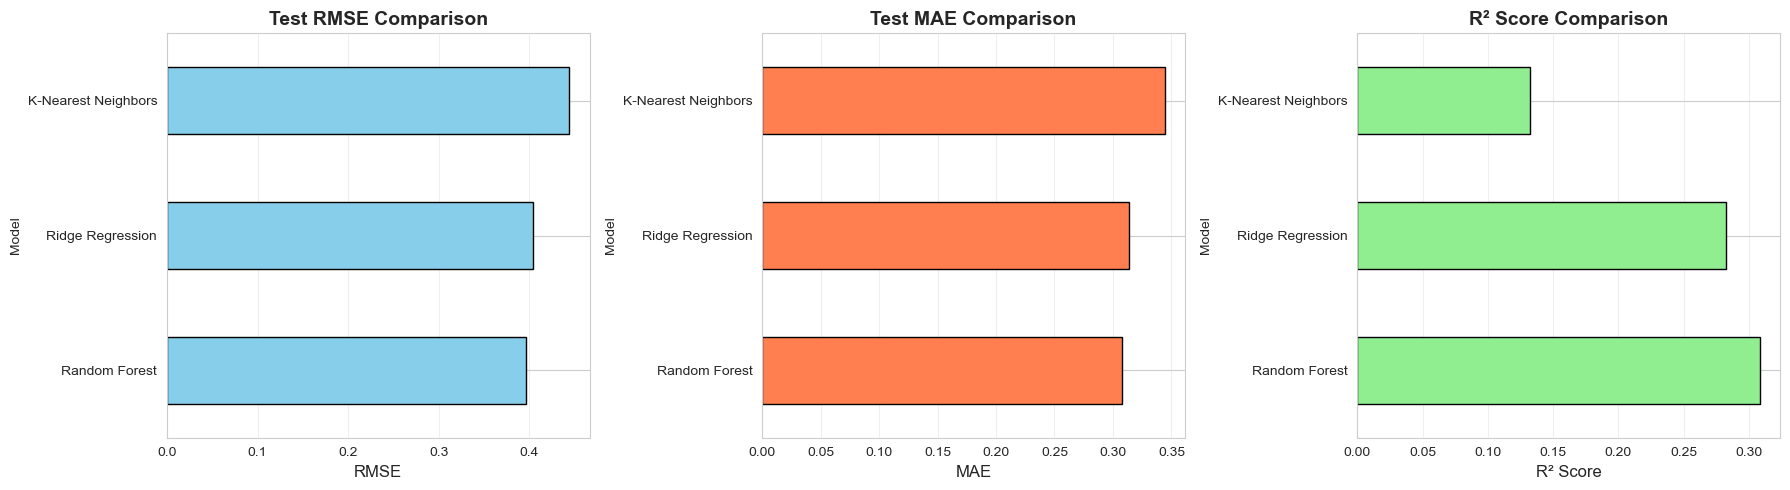


--- Model Summary Statistics ---
                         RMSE       MAE        R²  Train_RMSE  Overfitting  \
Model                                                                        
Random Forest        0.396510  0.307487  0.308512    0.364938     0.031573   
Ridge Regression     0.403917  0.313320  0.282436    0.398341     0.005576   
K-Nearest Neighbors  0.444145  0.344214  0.132389    0.163272     0.280873   

                     Rank  
Model                      
Random Forest         1.0  
Ridge Regression      2.0  
K-Nearest Neighbors   3.0  

🏆 BEST MODEL: Random Forest
   RMSE: 0.3965
   MAE: 0.3075

✅ Model comparison and visualizations completed!


In [98]:
print("=" * 80)
print("MODEL COMPARISON - REGRESSION MODELS")
print("=" * 80)

# Create comparison dataframe
regression_comparison = pd.DataFrame({
    'Model': ['Ridge Regression', 'K-Nearest Neighbors', 'Random Forest'],
    'RMSE': [ridge_test_rmse, knn_test_rmse, rfr_test_rmse],
    'MAE': [ridge_test_mae, knn_test_mae, rfr_test_mae],
    'R²': [ridge_r2, knn_r2, rfr_r2],
    'Train_RMSE': [ridge_train_rmse, knn_train_rmse, rfr_train_rmse]
}).set_index('Model')

# Sort by RMSE (best first)
regression_comparison = regression_comparison.sort_values('RMSE')

print("\n📊 Regression Model Comparison:")
print(regression_comparison)

# Calculate overfitting metrics
regression_comparison['Overfitting'] = regression_comparison['RMSE'] - regression_comparison['Train_RMSE']

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# RMSE comparison
regression_comparison['RMSE'].plot(kind='barh', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_xlabel('RMSE', fontsize=12)
axes[0].set_title('Test RMSE Comparison', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# MAE comparison
regression_comparison['MAE'].plot(kind='barh', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_xlabel('MAE', fontsize=12)
axes[1].set_title('Test MAE Comparison', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# R² comparison
regression_comparison['R²'].plot(kind='barh', ax=axes[2], color='lightgreen', edgecolor='black')
axes[2].set_xlabel('R² Score', fontsize=12)
axes[2].set_title('R² Score Comparison', fontsize=14, fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
summary_stats = regression_comparison.copy()
summary_stats['Rank'] = summary_stats['RMSE'].rank()
print("\n--- Model Summary Statistics ---")
print(summary_stats)

# Determine best model
best_model_name = regression_comparison.index[0]
best_rmse = regression_comparison.loc[best_model_name, 'RMSE']
best_mae = regression_comparison.loc[best_model_name, 'MAE']

print(f"\n{'='*70}")
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"   RMSE: {best_rmse:.4f}")
print(f"   MAE: {best_mae:.4f}")
print(f"{'='*70}")

print("\n✅ Model comparison and visualizations completed!")

## C.2.9: Save Model Artifacts

Save the best-performing model and necessary data for deployment:
- Best model (Random Forest)
- Feature scaler
- Movie data with features
- Movie titles for lookups

These artifacts will be used in the deployment phase (Section D).

In [99]:
print("=" * 80)
print("SAVING MODEL ARTIFACTS")
print("=" * 80)

# Create model_artifacts directory
model_artifacts_dir = os.path.join('MovieRecApp', 'model_artifacts')
os.makedirs(model_artifacts_dir, exist_ok=True)

print(f"Saving to: {model_artifacts_dir}")

# Determine best model (Random Forest based on comparison)
best_model = rfr_model  # Random Forest is the best performing model

# Save the best performing model
pickle.dump(best_model, open(os.path.join(model_artifacts_dir, 'best_model.pkl'), 'wb'))
print("✅ Saved best_model.pkl (RandomForest)")

# Save the scaler
pickle.dump(scaler, open(os.path.join(model_artifacts_dir, 'scaler.pkl'), 'wb'))
print("✅ Saved scaler.pkl")

# Create complete movie data DataFrame with all features and metadata
movie_data_complete = modeling_df.copy()

# Add all genre OHE columns
for col in movie_genres_ohe.columns:
    movie_data_complete[col] = movie_genres_ohe[col].values

# Define metadata and feature columns
expected_metadata_cols = ['movieId', 'title', 'genres', 'avg_rating', 'rating_count']
feature_cols = list(movie_genres_ohe.columns) + ['log_rating_count']

# Ensure all expected columns exist
if 'title' not in movie_data_complete.columns:
    movie_data_complete = pd.merge(
        movie_data_complete, 
        movies_df[['movieId', 'title']], 
        on='movieId', 
        how='left'
    )

# Reorder columns: metadata first, then features
final_metadata_cols = [col for col in expected_metadata_cols if col in movie_data_complete.columns]
all_cols = final_metadata_cols + feature_cols
movie_data_complete = movie_data_complete[all_cols]

# Save the complete movie data DataFrame
pickle.dump(movie_data_complete, open(os.path.join(model_artifacts_dir, 'movie_data.pkl'), 'wb'))
print("✅ Saved movie_data.pkl (complete DataFrame with metadata and features)")

# Save movie titles
movie_titles = movie_data_complete['title'].tolist()
pickle.dump(movie_titles, open(os.path.join(model_artifacts_dir, 'movie_titles.pkl'), 'wb'))
print("✅ Saved movie_titles.pkl")

# Print summary
print(f"\n--- Summary ---")
print(f"Model: RandomForest Regressor")
print(f"Total movies: {len(movie_data_complete)}")
print(f"Total features: {len(feature_cols)}")
print(f"Feature columns: {feature_cols[:5]}... + {len(feature_cols)-5} more")
print(f"\n✅ All artifacts saved successfully!")

SAVING MODEL ARTIFACTS
Saving to: MovieRecApp\model_artifacts
✅ Saved best_model.pkl (RandomForest)
✅ Saved scaler.pkl
✅ Saved movie_data.pkl (complete DataFrame with metadata and features)
✅ Saved movie_titles.pkl

--- Summary ---
Model: RandomForest Regressor
Total movies: 16116
Total features: 20
Feature columns: ['Action', 'Adventure', 'Animation', 'Children', 'Comedy']... + 15 more

✅ All artifacts saved successfully!
